# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("breast_cancer_data.csv")
data.head()

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [7]:
data.isnull()

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

Unnamed: 0            0
Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

# Data Exploration

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [14]:
data.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

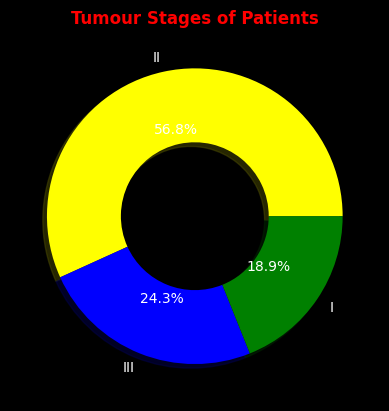

In [16]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Get the data
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, 
        startangle=0,wedgeprops={"width": 0.5},colors=[ "yellow", "blue",'green'])

# Add a title
plt.title("Tumour Stages of Patients",weight='bold',color='red')

# Show the plot
plt.show()

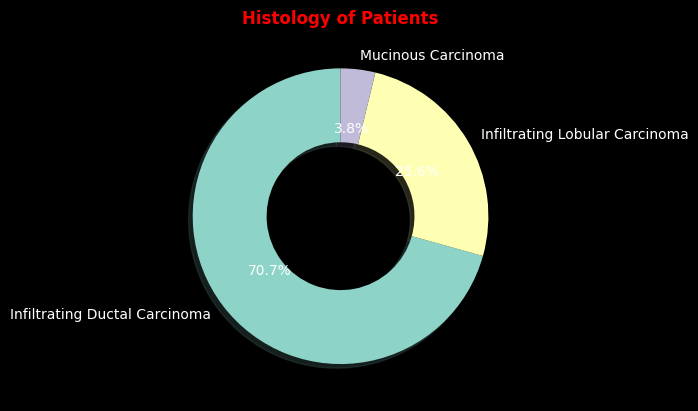

In [17]:
# Get the data
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, 
        startangle=90,wedgeprops={"width": 0.5})

# Add a title
plt.title("Histology of Patients",weight='bold',color='red')

# Show the plot
plt.show()

In [22]:
# ER Status
print(data["ER status"].value_counts())
# PR Status
print(data["PR status"].value_counts())
# HER2 Status
print(data["HER2 status"].value_counts())


Positive    334
Name: ER status, dtype: int64
Positive    334
Name: PR status, dtype: int64
Negative    305
Positive     29
Name: HER2 status, dtype: int64


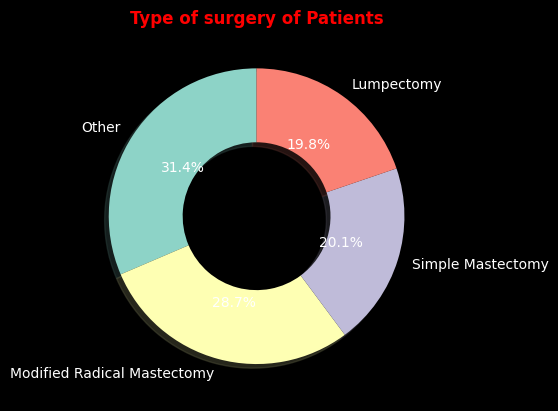

In [23]:
# Get the data
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, 
        startangle=90,wedgeprops={"width": 0.5})

# Add a title
plt.title("Type of surgery of Patients",weight='bold',color='red')

# Show the plot
plt.show()

# Data Encoding

In [8]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1,"Infiltrating Lobular Carcinoma": 2,"Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2,
"Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())


   Unnamed: 0    Patient_ID   Age  Gender  Protein1  Protein2  Protein3  \
0           0  TCGA-D8-A1XD  36.0     1.0  0.080353   0.42638   0.54715   
1           1  TCGA-EW-A1OX  43.0     1.0 -0.420320   0.57807   0.61447   
2           2  TCGA-A8-A079  69.0     1.0  0.213980   1.31140  -0.32747   
3           3  TCGA-D8-A1XR  56.0     1.0  0.345090  -0.21147  -0.19304   
4           4  TCGA-BH-A0BF  56.0     1.0  0.221550   1.90680   0.52045   

   Protein4  Tumour_Stage  Histology  ER status  PR status  HER2 status  \
0  0.273680           3.0        1.0        1.0        1.0          2.0   
1 -0.031505           2.0        3.0        1.0        1.0          2.0   
2 -0.234260           3.0        1.0        1.0        1.0          2.0   
3  0.124270           2.0        1.0        1.0        1.0          2.0   
4 -0.311990           2.0        1.0        1.0        1.0          2.0   

   Surgery_type Date_of_Surgery Date_of_Last_Visit Patient_Status  
0           2.0       15-Jan-1

# Model Training

In [4]:
# Splitting Data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2','Protein3','Protein4','Tumour_Stage', 'Histology', 'ER status', 'PR status',
'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10,random_state=42)




NameError: name 'data' is not defined

In [3]:
# Training Machine Learning model
model=SVC()
model.fit(xtrain,ytrain)
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

NameError: name 'xtrain' is not defined

'choco' is not recognized as an internal or external command,
operable program or batch file.
